합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다.

합성곱 신경망은 크게 합성곱층과 풀링층으로 구성된다

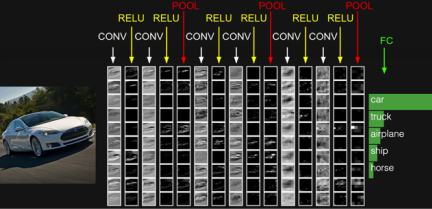

위의 그림에서 CONV는 합성곱 연산을 의미하고, 합성곱 연산의 결과가 활성화 함수 RELU를 지난다. 이 두 과정을 합성곱층이라고 한다. 그 후에 POLL이라는 구간을 지나는데 이는 풀링 연산을 의미하며 풀링층이라고 한다.

#1. 합성곱 신경망의 대두

합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망이다. 이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계가 있다. 예를 들어, 알파벳 손글씨를 분류하는 문제가 있다고 하면 아래의 그림은 알파벳 Y를 비교적 정자로 쓴 손글씨와 다소 휘갈겨 쓴 손글씨 두 개를 2차원 텐서인 행렬로 표현한 것이다.

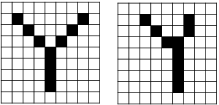

사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만, 기계가 보기에는 각 픽셀마다 가진 값이 거의 상이하므로 완전히 다른 값을 가진 입력이다. 그런데 이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재한다. 다층 퍼셉트론은 몇 가지 픽셀만 값이 달라져도 민감하게 예측에 영향을 받는다는 단점이 있다.

위 손글씨를 다층 퍼셉트론으로 분류한다고 하면, 이미지를 1차원 텐서인 벡터로 변환하고 다층 퍼셉트론의 입력층으로 사용해야 한다. 두 번째 손글씨를 다층 퍼셉트론으로 분류하기 위해서 벡터로 바꾸면 다음과 같다.

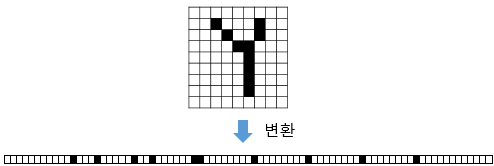

1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵다. 이는 기계도 마찬가지 이다. 위와 같이 결과는 변환 전에 가지고 있던 공간적인 구조 정보가 유실된 상태이다. 여기서 공간적인 구조 정보라는 것은 거리가 가까운 어떤 픽셀들끼리는 어떤 연관이 있고, 어떤 픽셀들끼리는 값이 비슷하거나 등을 포함하고 있다. 결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 사용하는 것이 합성곱 신경망이다.

#2. 채널(Channel)

기계는 글자나 이미지보다 숫자. 다시 말해, 텐서를 더 잘 처리할 수 있다. 이는 이미지는 (높이, 너비, 채널)이라는 3차원 텐서이다. 여기서 높이는 이미지의 세로 방향 픽셀 수, 너비는 이미지의 가로 방향 픽셀 수, 채널은 색 성분을 의미한다. 흑백 이미지는 채널 수가 1이며, 각 픽셀은 0부터 255사이의 값을 가진다.  28 × 28 픽셀의 손글씨 데이터이다.

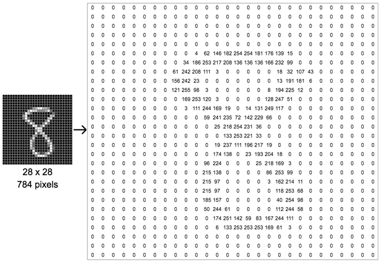

위 손글씨 데이터는 흑백 이미지므로 채널 수가 1임을 고려하면  (28 × 28 × 1)의 크기를 가지는 3차원 텐서이다. 그렇다면 흑백이 아니라 우리가 통상적으로 접하게 되는 컬러 이미지는 어떨까? 컬러 이미지는 적색, 녹색, 청색 채널 수가 3개이다.

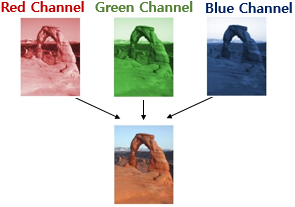

하나의 픽셀은 세 가지 색깔, 삼원색의 조합으로 이루어진다. 만약, 높이가 28, 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 (28 × 28 × 3)의 크기를 가지는 3차원 텐서이다. 채널은 때로는 깊이라고도 한다. 이 경우 이미지는  (높이, 너비, 깊이)라는 3차원 텐서로 표현된다고 할 수 있다.

#3. 합성곱 연산(Convolution operation)

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 한다. 합성곱은 영어로 컨볼류션이라고도 불리는데, 커널 또는 필터라는 n × m 크기의 행렬로 높이 × 너비 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 n × m크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한값을 출력으로 하는 것을 말한다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 훑는다.  
- 커널은 일반적으로 3 × 3 또는 5 × 5를 사용한다.

아래는 3 × 3크기의 커널로 5 × 5의 이미지 행렬에 합성곱 연산을 수행하는 과정을 보여준다. 한 번의 연산을 1스텝이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 이미지와 식이다.

##1. 첫번째 스텝

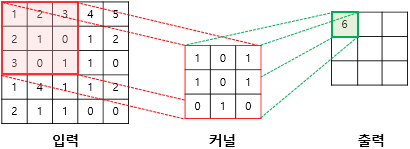

(1×1) + (2×0) + (3×1) + (2×1) + (1×0) + (0×1) + (3×0) + (0×1) + (1×0) = 6

##2. 두번째 스텝

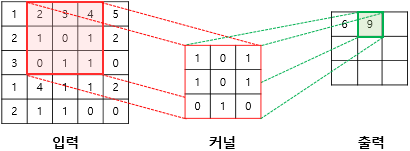

(2×1) + (3×0) + (4×1) + (1×1) + (0×0) + (1×1) + (0×0) + (1×1) + (1×0) = 9

##3. 세번째 스텝

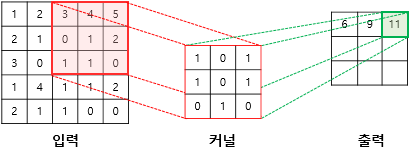

(3×1) + (4×0) + (5×1) + (0×1) + (1×0) + (2×1) + (1×0) + (1×1) + (0×0) = 11

##4. 네번째 스텝

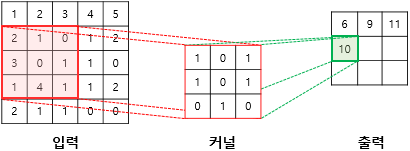

(2×1) + (1×0) + (0×1) + (3×1) + (0×0) + (1×1) + (1×0) + (4×1) + (1×0) = 10

위 연산을 총 9번의 스텝까지 마쳤다고 가정하였을 때, 최종 결과는 아래와 같다.

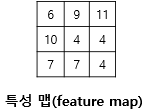

위와 같이 입력으로부터 커널을 사용하여 합성곱 연산을 통해 나온 결과를 특성맵이라고 한다.

위의 예제에서는 커널의 크기가  3 × 3이었지만, 커널의 크기는 사용자가 정할 수 있다. 또한 커널의 이동 범위가 위의 예제에서는 한 칸이었지만, 이 또한 사용자가 정할 수 있다. 이러한 이동 범위를 스트라이드라고 한다.

아래의 예제는 스트라이드가 2일 경우에  5 × 5 이미지에 합성곱 연산을 수행하는  3 × 3 커널의 움직임을 보여준다. 최종적으로  2 × 2의 크기의 특성 맵을 얻는다.

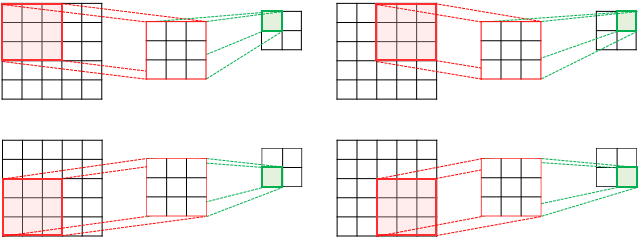

#4. 패딩(Padding)

위의 예에서 5 × 5 이미지에 3 × 3의 커널로 합성곱 연산을 하였을 때, 스트라이드가 1일경우에는 3 × 3의 특성 맵을 얻었다. 이와 같이 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특성이 있다. 만약, 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 된다. 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩을 사용하면 된다.

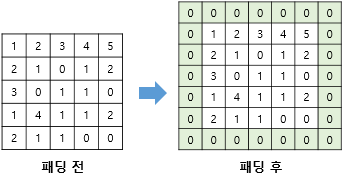

패딩은 입력의 가장자리에 지정된 개수의 폭만큼 행과 열을 추가해주는 것을 말한다. 좀더 쉽게 설명하면 지정된 개수의 폭만큼 테두리를 추가한다. 주로 값을 0으로 채우는 제로 패딩을 사용한다. 위의 그림은 5 × 5 이미지에 1폭짜리 제로 패딩을 사용하여 위, 아래에 하나의 행을 좌, 우에 하나의 열을 추가한 모습을 보여준다.

커널은 주로 3 × 3 또는 5 × 5 를 사용한다고 언급 했었는데 만약 스트라이드가 1이라고 하였을때, 3 × 3 크기의 커널을 사용한다면 1폭짜리 제로 패딩을 사용하고, 5 × 5 크기의 커널을 사용한다면 2폭 짜리 제로 패딩을 사용하면 입력과 특성 맵의 크기를 보존할 수 있다. 예를 들어 5 × 5 크기의 이미지에 1폮자리 제로 패딩을 하면 7 × 7 이미지가 되는데, 여기에 3 × 3의 커널을 사용하여 1스트라이드로 합성곱을 한 후의 특성 맵은 기존의 입력 이미지의 크기와 같은 5 × 5가 된다.   

#5. 가중치와 편향

##1. 합성곱 신경망의 가중치

다층 퍼셉트론으로 3 × 3 이미지를 처리한다고 하면 우선 이미지를 1차원 텐서인 벡터로 만들면, 3 × 3 = 9 가 되므로 입력층은 9개의 뉴론을 가진다. 그리고 4개의 뉴론을 가지는 은닉층을 추가한다고 하면 이는 아래 그림과 같다.

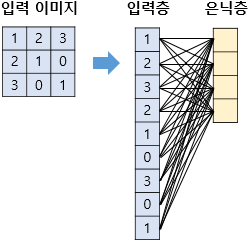

위에서 각 연결선은 가중치를 의미하므로, 위의 그림에서는  9 × 4 = 36개의 가중치를 가진다. 이제 비교를 위해 합성곱 신경마으로 3 × 3 이미지를 처리한다고 하면  2 × 2 커널을 사용하고, 스트라이드는 1로한다.

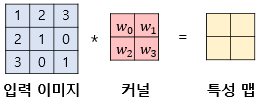

사실 합성곱 신경망에서 가중치는 커널 행렬의 원소들이다. 이를 인공 신경망의 형태로 표현한다면 다음과 같다.

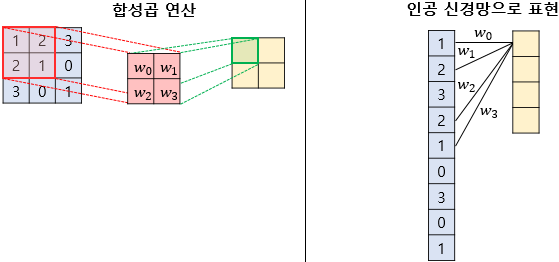

최종적으로 특성 맵을 얻기 위해서는 동일한 커널로 이미지 전체를 훑으며 합성곱 연산을 진행한다. 결국 이미지 전체를 훑으면서 사용되는 가중치는 w0, w1, w2, w3 4개 뿐이다. 그리고 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있다. 결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때 보다 훨씬 적은 수의 가중치를 사용하며 공간적 구조 정보를 보전한다는 특징이 있다.

다층 퍼셉트론의 은닉층에서는 가중치 연산 후에 비선현성을 추가하기 위해서 활성화 함수를 통과 시켰다. 합성곱 신경망의 은닉층에서도 마찬가지이다. 합성곱 연산을 통해 얻은 특성 맵은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 지나게 된다. 이때 렐루 함수나 렐루 함수의 변형들이 주로 사용된다. 이와 같이 합성곱 연산을 통해서 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 합성고 신경망에서는 합성곱 층이라고 한다.

##2. 합성곱 신경망의 편향

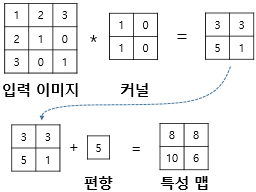

합성곱 신경망에서도 편향을 당연히 추가할 수 있다. 만약, 편향을 사용한다면 커널을 적용한 뒤에 더해진다. 편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해진다.

#6. 특성 맵의 크기 계산 방법

입력의 크기와 커널의 크기, 그리고 스트라이드의 값만 알면 합성곱 연산의 결과인 특성 맵의 크기를 계산할 수 있다.

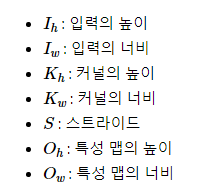

이에 따라 특성 맵의 높이와 너비는 다음과 같다.

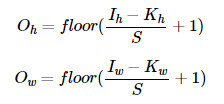

여기서 floor함수는 소수점 발생 시 소수점 이하를 버리는 역할을 한다. 예를들어 위의 첫번째 예제의 경우 5 × 5 크기의 이미지에 3 × 3 커널을 사용하고 스트라이드 1로 합성곱 연산을 한 경우 특성 맵의 크기는 (5 - 3 + 1) × (5 - 3 + 1) = 3 × 3임을 알 수 있다. 이는 또한 총 9번의 스텝이 필요함을 의미한다.

패딩의 폭을 P라고 하고, 패딩까지 고려한 식은 다음과 같다.

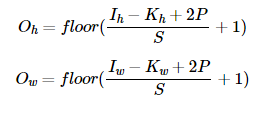

#7. 다수의 채널을 가질 경우의 합성곱 연산(3차원 텐서의 합성곱 연산)

합성곱 연산은 입력은 다수의 채널을 가진 이미지 또는 이전 연산의 결과로 나온 특성 맵일 수 있다. 만약, 다수의 채널을 가진 입력 데이터를 가지고 합성곱 연산을 한다고 하면 커널의 채널 수도 입력의 채널 수 만큼 존재해야 한다. 다시 말해 입력 데이터의 채널 수와 커널의 채널 수는 같아야 한다. 채널 수가 같으므로 합성곱 연산을 채널마다 수행한다. 그리고 그 결과를 모두 더하여 최종 특성 맵을 얻는다.

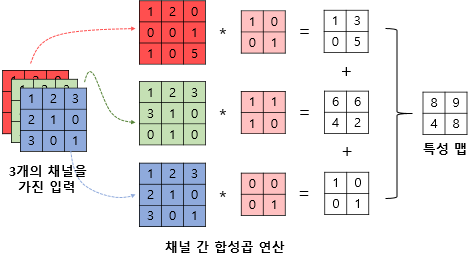

위 그림은 3개의 채널을 가진 입력 데이터와 3개의 채널을 가진 커널의 합성곱 연산을 보여준다. 커널의 각 채널 끼리의 크기는 같아야 한다. 각 채널 간 합성곱 연산을 마치고, 그 결과를 모두 더해서 하나의 채널을 가지는 특성 맵을 만든다. 주의 할 점은 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널이라는 점이다.

#8. 3차원 텐서의 합성곱 연산

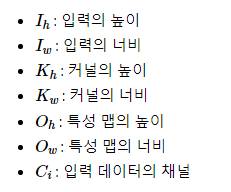

다음은 3차원 텐서의 합성곱 연산이다.

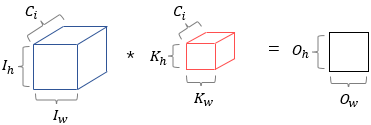

높이 Ih 너비 Iw 채널 Ci의 입력 데이터는 동일한 채널 수 Ci를 가지는 높이 Kh 너비 Kw의 커널과 합성곱 연산을 하여 높이 Oh 너비 Ow 채널 1의 특성 맵을 얻는다. 그런데 하나의 입력에 여러 개의 커널을 사용하는 합성곱 연산을 할 수도 있다.

합성곱 연산에서 다수의 커널을 사용할 경우, 특성 맵의 크기가 어떻게 바뀌는지 보면 C0를 합성곱 연산에 사용하는 커널의 수라고 하였을 때의 합성곱 연산 과정이다.

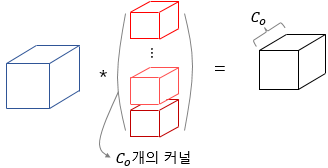

합성곱 연산에서 다수의 커널을 사용할 경우, 사용한 커널 수는 합성곱 연산의 결과로 나오는 특성 맵의 채널 수가 된다.

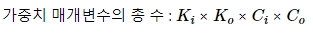

#9. 풀링(Pooling)


일반적으로 합성곱 층 다음에는 풀링 층을 추가하는 것이 일반적이다. 풀링 층에서는 특성 맺을 다운 샘플링 하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어진다. 풀링 연산에는 일반적으로 최대 풀링과 평균 풀링이 사용된다.

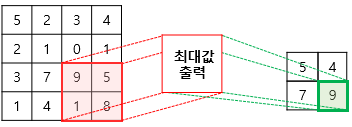

풀링 연산에서도 합성곱 연산과 마찬가지로 커널과 스트라이드의 개념을 가진다. 위의 그림은 스트라이드가 2일 때, 2 x 2 크기 커널로 맥스 풀링 연산을 했을 때 특성맵이 절반의 크기로 다운샘플링되는 것을 보여준다. 맥스 풀링은 커널과 겹치는 영역 안에서 최대값을 추출하는 방식으로 다운 샘플링 한다.

다른 풀링 기법인 평균 풀링은 최대값을 추출하는 것이 아니라 평균값을 추출하는 연산이 된다. 풀링 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 합성곱 연산과의 차이점은 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점이다.